<h1 style="text-align:center; font-size: 2.5em;"> K-Nearest Neighbors and K-Means Clustering</h1>

# Table of contents
1. [Introduction](#tit1)
2. [Datasets](#tit2)
3. [Classification: K-Nearest Neighbors (KNN)](#tit3)
4. [K-Means Clustering](#tit4")
5. [Conclusion](#tit5)

# Introduction <a name="tit1"></a> 
In this notebook, we propose to compare a K-Nearest Neighbors (KNN) of SKLEARN library and a local realization of this algorithm, the same for K-means
<br>
As reminder: 
<br>
* The KNN is included in the supervised learning 
* K-means in the other hand is a part of unsupervised learning (clusterization algorithm)

### Libraries

In [88]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA as SklearnPCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn import metrics

# Dataset <a name="tit2">

### Data form the used car dataset

This dataset is already presented in the portfolio, for more information, please check the below projects
<br>
[Project 1, July 2022 : Web scraping](https://github.com/bouz1/web_scraping/blob/main/Web_scaping_V3.ipynb)
<br>
[Project 2, October 2022 : Manipulation of second hand vehicles data](https://github.com/bouz1/Manipulation_of_second_hand_vehicles_data/blob/main/Data_Manipulation_Lacentral_V1.ipynb)

##### Load Data and explore it

Read data directly from github repository
<br> 
If you have any problem, you can download the file locally and read it by the below link
<br>
https://github.com/bouz1/Manipulation_of_second_hand_vehicles_data/blob/main/datasets/used_cars_data_250.csv

In [89]:
dfr=pd.read_csv('https://raw.githubusercontent.com/bouz1/Manipulation_of_second_hand_vehicles_data/main/datasets/used_cars_data_250.csv')
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250 entries, 0 to 7249
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model1             7250 non-null   object 
 1   model2             7250 non-null   object 
 2   version            7250 non-null   object 
 3   price              7250 non-null   float64
 4   km                 7250 non-null   float64
 5   fuel               7250 non-null   float64
 6   CV_fisc            7250 non-null   float64
 7   HorseP             7250 non-null   float64
 8   Gearbox_auto       7250 non-null   float64
 9   L_by_100km         7250 non-null   float64
 10  numbe_seats        7250 non-null   float64
 11  doors_nb           7250 non-null   float64
 12  Euro_stand         7250 non-null   float64
 13  Length             7250 non-null   float64
 14  Nb_option          7250 non-null   float64
 15  registration_date  7250 non-null   float64
dtypes: float64(13), object(3

In [90]:
dfr.head(2)

,model1,model2,version,price,km,fuel,CV_fisc,HorseP,Gearbox_auto,L_by_100km,numbe_seats,doors_nb,Euro_stand,Length,Nb_option,registration_date
0,RENAULT,MEGANE 4,IV 1.6 TCE 205 ENERGY GT EDC7,23440.0,78325.0,0.0,11.0,205.0,1.0,4.9,5.0,5.0,6.0,4.36,40.0,3183.0
1,RENAULT,CLIO 5,V 1.0 TCE 100 INTENS,19930.0,27008.0,0.0,5.0,101.0,0.0,5.3,5.0,5.0,6.0,4.05,11.0,4085.0


In [91]:
dfr.columns

Index(['model1', 'model2', 'version', 'price', 'km', 'fuel', 'CV_fisc',
       'HorseP', 'Gearbox_auto', 'L_by_100km', 'numbe_seats', 'doors_nb',
       'Euro_stand', 'Length', 'Nb_option', 'registration_date'],
      dtype='object')

##### Chose only cars from the models 'RENAULT','JAGUAR','MERCEDES','FERRARI' and 'FIAT'

In [92]:
dfr_sub=dfr[dfr.model1.isin(['RENAULT','JAGUAR','MERCEDES','FERRARI','FIAT'])].reset_index(drop=True)

In [93]:
index=list(dfr_sub.index)

##### Choose the input data and normalize it

In [94]:
X=dfr_sub[['price', 'km', 'fuel', 'CV_fisc','HorseP', 'Gearbox_auto', 'L_by_100km', 'numbe_seats', 
       'doors_nb','Euro_stand', 'Length', 'Nb_option', 'registration_date']]
X=X.values
X=X.astype(float)
Xmean=X.mean(axis=0)
X=X-Xmean
Xstd=X.std(axis=0)
X=X/Xstd
print(X.mean(),X.std())

2.0288727962626862e-16 1.0


In [95]:
X[:3,:5]

array([[-0.47794086,  0.25883666, -1.08172958, -0.38878985, -0.25606494],
       [-0.50287858, -0.92039532, -1.08172958, -0.65089536, -0.72726562],
       [-0.55424601,  1.08466902, -1.08172958, -0.65089536, -0.77710415]])

##### Shape of the input array 

In [96]:
X.shape

(1250, 13)

##### The output labels

In [97]:
Y=dfr_sub.model1.values
Y

array(['RENAULT', 'RENAULT', 'RENAULT', ..., 'FERRARI', 'FERRARI',
       'FERRARI'], dtype=object)

#### Split the dataset for train dataset and test dataset

In [98]:
X_train, X_test, y_train, y_test , index_train, index_test= train_test_split( X, Y, index,test_size=0.2, random_state=0)

In [99]:
len(index_train),len(X_train)

(1000, 1000)

#### Use Sklearn PCA algorithm to reduce the input dimension for ploting prepose 
For more details about the PCA algorithme, Please see the below project: 
<br>

[PCA algorithm for dimensionality reduction](https://bouz1.github.io/fils/PCA_SVM_dimension_reduction.html)

In [100]:
pca = SklearnPCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

##### Trasfrome the data: dim = (1250, 13) to dim =(1250, 2)

In [101]:
Xtrans=pca.transform(X)

##### Organize the data in a dataFrame to plot it

In [102]:
dfplot=pd.DataFrame(Xtrans,columns=['x1','x2'])
dfplot['y']=Y

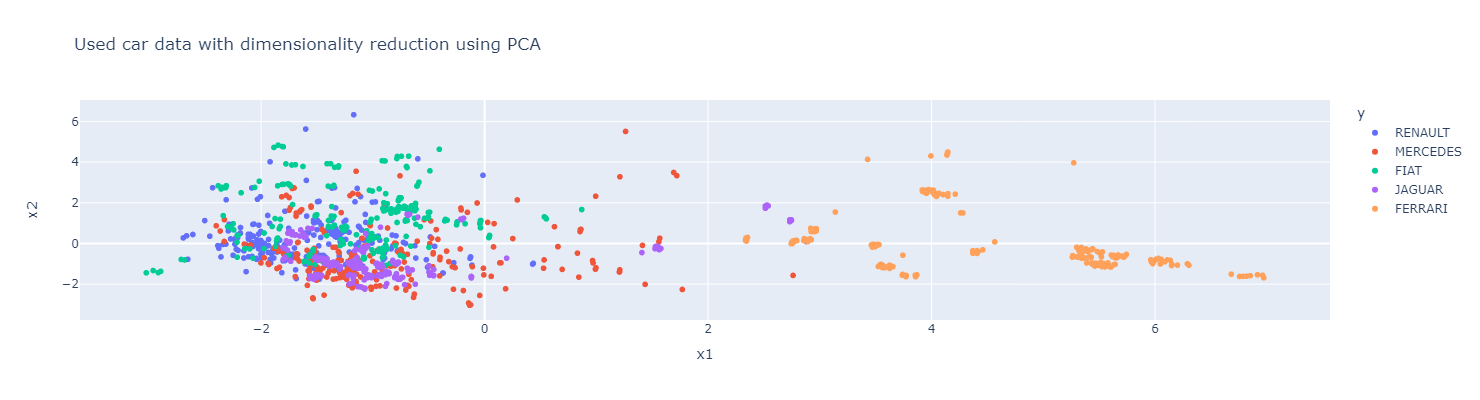

In [103]:
px.scatter(dfplot,x='x1',y='x2',color='y',height=400, width=1000,title='Used car data with dimensionality reduction using PCA')

<br>
<br>
<br>

### Bolbs data 
Lets make some random data as blobs around 4 points. 
<br> 
For your information: You can use the sklearn object [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to make blobs data, but in this project we will generate data manually for understanding purpose

##### Set the random seed for repeatability

In [104]:
np.random.seed(8)

##### Pick random angles and radius and centers to form

In [105]:
Nclass=4
Npoints=100
Centers=np.random.uniform(-1,1,(Nclass,2,1))
angles=np.random.uniform(0,2*np.pi,(Nclass,Npoints))
Radious=np.random.uniform(0,0.5,(Nclass,Npoints))

##### Compute X and Y coordinates

In [106]:
xp=(Radious*np.cos(angles))
yp=(Radious*np.sin(angles))

##### Organize the points in a dataFrame and add the class column

In [107]:
df=pd.DataFrame(index=range(Nclass*Npoints),columns=['x','y','class'])
for i in range (Nclass):
    xy=np.stack([xp[i],yp[i]])+Centers[i]
    df['x'][i*100:i*100+100]=xy[0]
    df['y'][i*100:i*100+100]=xy[1]
    df['class'][i*100:i*100+100]=i
    

##### Plot the points

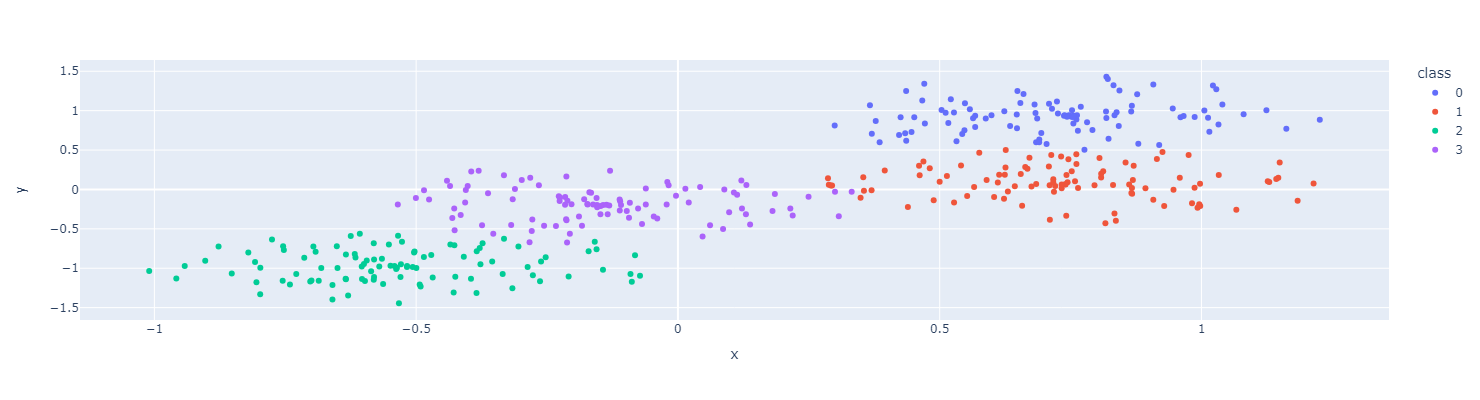

In [108]:
px.scatter(df,x='x',y='y',color='class',height=400, width=450)

##### Pick the coordinates as input data and the classes as output

In [109]:
X4=df[['x','y']].values

In [110]:
X4.shape

(400, 2)

In [111]:
Y4=df[['class']].values
Y4.shape

(400, 1)

# Classification: K-Nearest Neighbors (KNN) <a name="tit3">

##### Wikipedia definbition of the Knn: 
<br>
The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.
<br>
<br>
In the classification phase, k is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the k training samples nearest to that query point.
<br> 
<br>
A commonly used distance metric for continuous variables is Euclidean distance. For discrete variables, such as for text classification, another metric can be used, such as the overlap metric (or Hamming distance).
<BR><BR>
The best choice of k depends upon the data; generally, larger values of k reduces effect of the noise on the classification,[7] but make boundaries between classes less distinct. A good k can be selected by various heuristic techniques (see hyperparameter optimization). The special case where the class is predicted to be the class of the closest training sample (i.e. when k = 1) is called the nearest neighbor algorithm.

***Below a figure form KNN page from*** [WIKIPEDIA](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins)

<img src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png" decoding="async" width="220" height="199" class="thumbimage" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/330px-KnnClassification.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/440px-KnnClassification.svg.png 2x" data-file-width="279" data-file-height="252">

Exemple de classification k-NN . L'échantillon de test (point vert) pourrait être classé soit dans la première classe de carré bleu ou la seconde classe de triangles rouges. Si k = 3 (cercle en ligne pleine) il est affecté à la classe des triangles car il y a deux triangles et seulement un carré dans le cercle considéré. Si k = 5 (cercle en ligne pointillée) il est affecté à la classe des carrés (3 carrés face à deux triangles dans le cercle externe).

### KNN algorithm without Sklearn library

##### The loop 

In [112]:
# Neighbers Nb
k=5
# List for y-hate prediction
yhat_test=[]
# Loop the test input data
for i in range(len(X_test)):
    # Calculate the distance each test input and train inputs 
    dis=np.linalg.norm(X_train-X_test[i], axis=1)
    # Sort the calculated distances, and pick k arguments of the nearest train points to the computed test point
    index_sort=np.argsort(dis).tolist()[:k]
    # Chose the label with the maximum number in the K chosen train points
    yhat_test.append(pd.Series(y_train[index_sort]).value_counts().keys()[0])
# List => array
yhat_test=np.array(yhat_test)
# Accuracy calculation
print ('Test set accuracy:', metrics.accuracy_score(y_test, yhat_test))

Test set accuracy: 0.824


##### Comapre the predict output labels, with the test labels

In [113]:
y_test[:10]

array(['FIAT', 'JAGUAR', 'RENAULT', 'JAGUAR', 'RENAULT', 'FERRARI',
       'RENAULT', 'RENAULT', 'JAGUAR', 'FERRARI'], dtype=object)

In [114]:
yhat_test[:10]

array(['FIAT', 'JAGUAR', 'RENAULT', 'JAGUAR', 'FIAT', 'FERRARI', 'FIAT',
       'RENAULT', 'MERCEDES', 'FERRARI'], dtype='<U8')

##### Use a class to organize the local KNN algorithm

In [115]:
class KNN():
    def __init__(self,k):
        self.k=k
    def fit(self,x,y):
        self.x_train=x
        self.y_train=y
    def Predict(self,x_test):
        # List for y-hate prediction
        yhat_test=[]
        # Loop the test input data
        for i in range(len(x_test)):
            # Calculate the distance each test input and train inputs 
            dis=np.linalg.norm(self.x_train-x_test[i], axis=1)
            # Sort the calculated distances, and pick k arguments of the nearest train points to the computed test point
            index_sort=np.argsort(dis).tolist()[:k]
            # Chose the label with the maximum number in the K chosen train points
            yhat_test.append(pd.Series(self.y_train[index_sort]).value_counts().keys()[0])
        # List => array
        yhat_test=np.array(yhat_test)
        return yhat_test

#####  Make a test of the KNN object

In [116]:
knn=KNN(5)
knn.fit(X_train,y_train)

In [117]:
yhat=knn.Predict(X_test)

In [118]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.824


##### Loop with Neighbors number: from 2 to 9

In [119]:
Train_Acc=[]
Test_Acc=[]
for k in range(2,10):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat_train = knn.predict(X_train)
    yhat_test = knn.predict(X_test)
    Train_Acc.append(metrics.accuracy_score(y_train, yhat_train))
    Test_Acc.append(metrics.accuracy_score(y_test, yhat_test))

##### Ploting the accuracy of train/test datasets

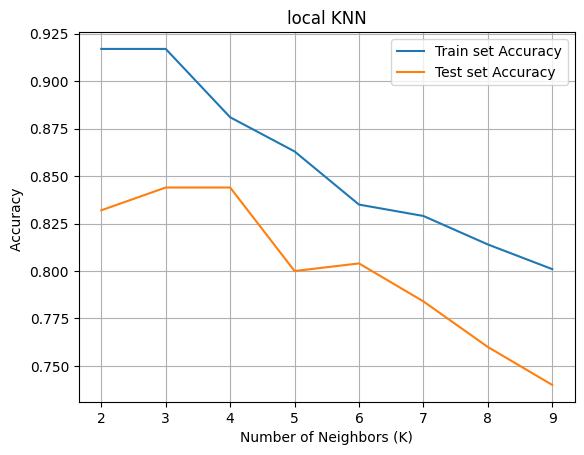

In [120]:
import matplotlib.pyplot as plt
x_range=range(2,10)
plt.plot(x_range,Train_Acc,label='Train set Accuracy')
plt.plot(x_range,Test_Acc,label="Test set Accuracy")
plt.title('local KNN')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.grid()
plt.legend()
plt.show()

The optimum neighbors number is 4: see the test accuracy for k = 4

### KNN of Sklearn library

For more information see the below link:
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

##### Number of neighbors = 4

In [121]:
k = 4 
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

##### Prediction

In [122]:
yhat_train = knn.predict(X_train)
yhat_test = knn.predict(X_test)
yhat_test[:10]

array(['FIAT', 'JAGUAR', 'FIAT', 'JAGUAR', 'FIAT', 'FERRARI', 'FIAT',
       'RENAULT', 'MERCEDES', 'FERRARI'], dtype=object)

##### Show the first 10 labels to compare theme with the prediction

In [123]:
y_test[:10]

array(['FIAT', 'JAGUAR', 'RENAULT', 'JAGUAR', 'RENAULT', 'FERRARI',
       'RENAULT', 'RENAULT', 'JAGUAR', 'FERRARI'], dtype=object)

##### Accuracy calculation

In [124]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_test))

Train set Accuracy:  0.881
Test set Accuracy:  0.844


##### Loop with Neighbors number: from 2 to 9

In [125]:
Train_Acc=[]
Test_Acc=[]

for k in range(2,10):
    ## Creat the KNN object and fit it, and predict the output labels 
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat_train = knn.predict(X_train)
    yhat_test = knn.predict(X_test)
    ## Accurancy calculation of the train/test dataset
    Train_Acc.append(metrics.accuracy_score(y_train, yhat_train))
    Test_Acc.append(metrics.accuracy_score(y_test, yhat_test))

##### Ploting the accuracy of train/test datasets

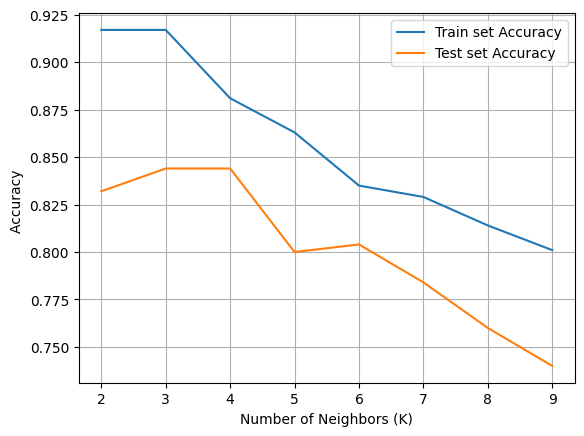

In [126]:
x_range=range(2,10)
plt.plot(x_range,Train_Acc,label='Train set Accuracy')
plt.plot(x_range,Test_Acc,label="Test set Accuracy")
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.grid()
plt.legend()
plt.show()

The optimum neighbors number is **4**: see the test accuracy for k = 4

##### Comparaison: Sklearn vs local algorithm

In [127]:
# Sklearn algorithm
yhat_test_sklearn = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train).predict(X_test)
# Local algorithm 
yhat_test_local = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train).predict(X_test)

##### Both algorithm have the same prediciton

In [128]:
metrics.accuracy_score(yhat_test_sklearn,yhat_test_local)

1.0

***Conculsion***
<br> 
The local algorith has the same performance of Sklearn algorithm

# K-Means Clustering <a name="tit4">

**K-means clustering [Wikipedia definition](https://en.wikipedia.org/wiki/K-means_clustering)**
<br> 
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

### K-Means clustering with local algorithm

**k-Means clustering algorithm [from IBM course](https://www.coursera.org/learn/machine-learning-with-python?specialization=ibm-data-science)**
1. Randomly placing k centroids, one for each cluster.
2. Calculate the distance of each point from each centroid.
3. Assign each data point (object) to its closest centroid, creating a cluster.
4. Recalculate the position of the k centroids.
5. Repeat the steps 2-4, until the centroids no longer move.

##### Choose Centroids randomly

In [129]:
# Nb of classes
Nclass=4
# pick up N centroids randomly 
l=list(range(len(X4)))
np.random.shuffle(l)
l=l[0:Nclass]
centroids=X4[l]

##### Calculate distance between each points and the centroids

In [130]:
dis=[]
for i in range(Nclass):
    dis.append(np.linalg.norm((X4-centroids[i]).astype(float),axis=1).tolist())
dis=np.array(dis).T
dis[:4]

array([[1.95908444, 1.43889632, 0.43482965, 0.2465904 ],
       [1.92556358, 1.37500119, 0.36554503, 0.17401544],
       [1.74292637, 1.16692388, 0.41324117, 0.26772603],
       [1.64974405, 1.02017667, 0.4578316 , 0.37597977]])

##### Distance matrix shape

In [131]:
dis.shape

(400, 4)

##### Choose the closest centroid to each points

In [132]:
argmin=np.argmin(dis,axis=1)

In [133]:
argmin

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 1, 0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### Move the centroid to the new centroid of each group of points

In [134]:
for i,v in enumerate(set(argmin)):
    centroids[i]=X4[argmin==v].mean(axis=0)

##### Combine all the above steps into a single function

In [135]:
def K_means_cluster(X,Nclass=4,threshold =1e-7,centroids=None):
    n=0
    # Choose Centroids randomly
    if centroids is None: # If the centroids are given, just keep them
        l=list(range(len(X)))
        np.random.shuffle(l)
        l=l[0:Nclass]
        centroids=X[l]
    # the main loop 
    while (1):
        # Calculate distance between each points and the centroids
        dis=[]
        for i in range(Nclass):
            dis.append(np.linalg.norm((X-centroids[i]).astype(float),axis=1).tolist())
        dis=np.array(dis).T
        # Choose the closest centroid to each points
        argmin=np.argmin(dis,axis=1)
        centroids_old=centroids.copy()
        for i,v in enumerate(set(argmin)):
            centroids[i]=X[argmin==v].mean(axis=0)
        n=n+1
        # Stop the loop if the centroids no longer move
        if np.linalg.norm(centroids-centroids_old) < threshold : # if the centroid don't move anymore
            print('nb of etheration',n)
            break 
    # Return the classes
    return argmin

##### First test of the function
Choose 4 centroids manually for initialization

In [136]:
centroids=np.array([[0.6039434255267925, -0.034677266537192525],
 [-0.16209396681324043, -0.3872694113078887],
 [0.7470898118070228, 1.8747047129392782],
 [0.6261767384058478, 0.5625124674266159]])

##### Calculate the classes with the function

In [137]:
argmin=K_means_cluster(X4,Nclass=4,centroids=centroids)

nb of etheration 30


##### Organize the data in a DF to plot it

In [138]:
df=pd.DataFrame()
df['y_class']=argmin.astype('str')
df['x']=X4[:,0]
df['y']=X4[:,1]

##### Plot the points with there calculated classes

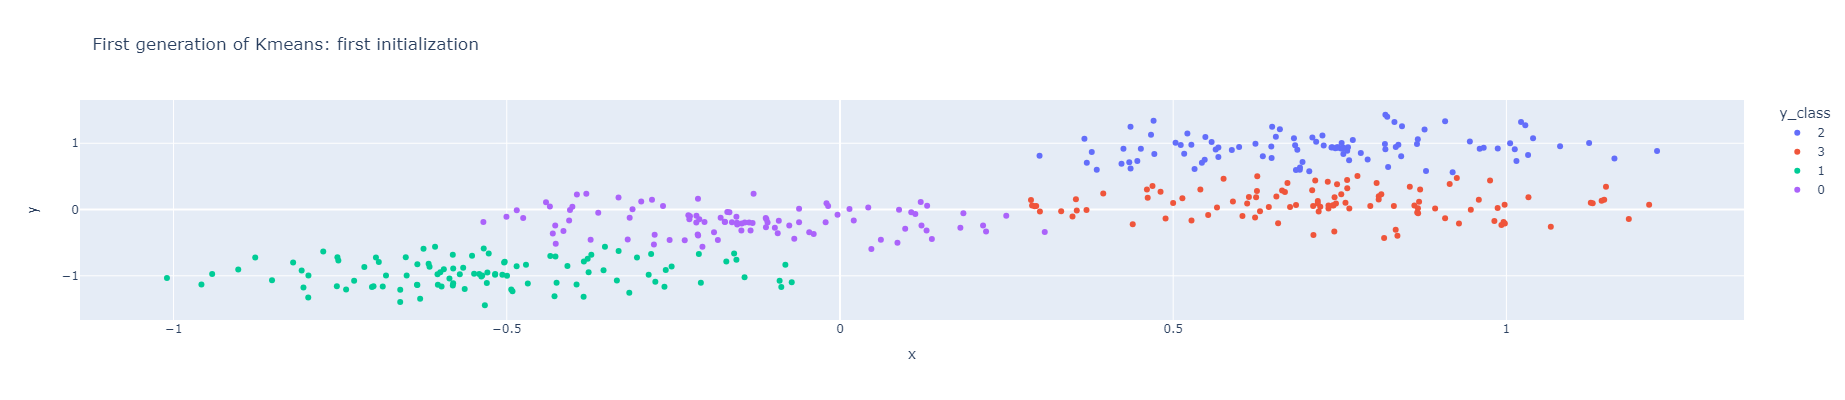

In [139]:
px.scatter(df,x='x',y='y',color='y_class',height=400, width=450,
           title='First generation of Kmeans: first initialization')

In this example, the function find the right optimum, let's test with another example

##### Test this new centroids for initialization

In [140]:
centroids=np.array([[-0.7976136710740972, -1.9719076146581345],
 [-0.7541216831342457 ,-1.6989211232648396],
 [0.6676567976253728 ,0.3256860888119558],
 [-0.5173347524345656, -1.9491536452861915]])
argmin=K_means_cluster(X4,Nclass=4,centroids=centroids)

nb of etheration 23


##### Plot the result

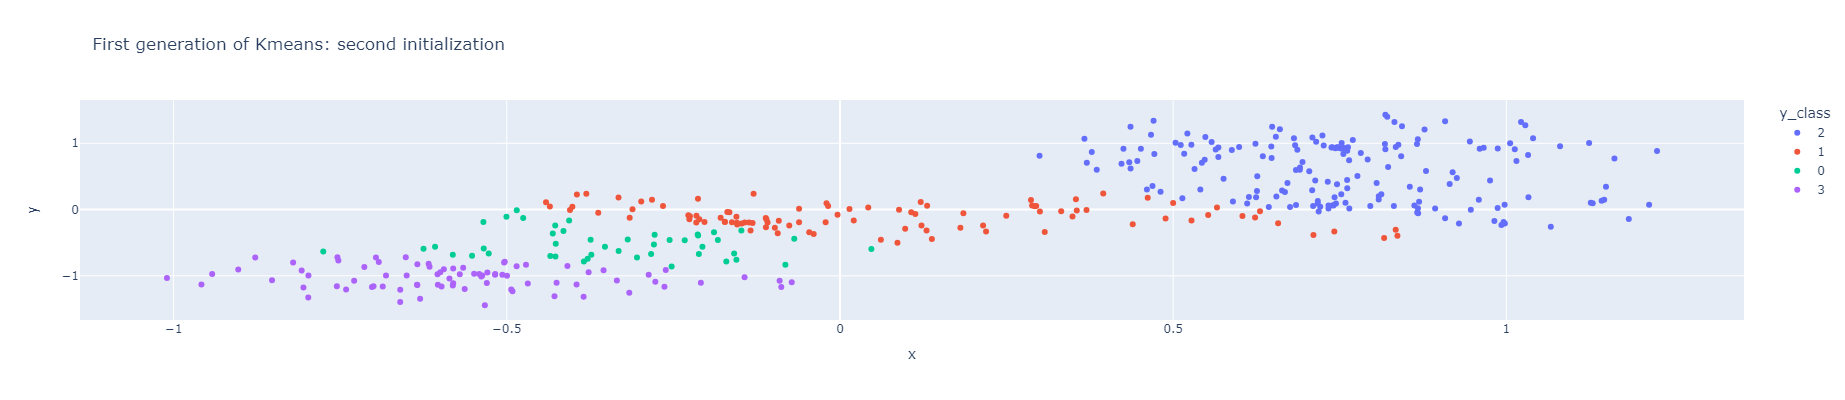

In [141]:
df=pd.DataFrame()
df['y_class']=argmin.astype('str')
df['x']=X4[:,0]
df['y']=X4[:,1]
px.scatter(df,x='x',y='y',color='y_class',height=400, width=450,
           title='First generation of Kmeans: second initialization')

We can see that in this example, the algorithm didn't find the right optimum. 
<br>
One solution to solve this problem is to do many time the algorithm with different initialisation centroids, and to choose the result with minimum mean distance between points and their centroids

##### Second generation of the algorithm, with the above improvement 

In [142]:
def K_means_cluster_V2(X,Nclass=4,Nrepetitions=5,threshold =1e-7,centroids=None):
    DIS=[]
    CLASSES=[]
    CENTROIDS=[]
    # Loop of repeting the algorithm
    for k in range(Nrepetitions):
        # Choose Centroids randomly
        if centroids is None: # If the centroids are given, just keep them
            np.random.seed(None)
            l=list(range(len(X)))
            np.random.shuffle(l)
            l=l[0:Nclass]
            centroids=X[l]
        # the main loop 
        while (1):
            # Calculate distance between each points and the centroids
            dis=[]
            for i in range(Nclass):
                dis.append(np.linalg.norm((X-centroids[i]).astype(float),axis=1).tolist())
            dis=np.array(dis).T
            # Choose the closest centroid to each points
            argmin=np.argmin(dis,axis=1)
            centroids_old=centroids.copy()
            for i,v in enumerate(set(argmin)):
                centroids[i]=X[argmin==v].mean(axis=0)
            # Stop the loop if the centroids no longer move
            if np.linalg.norm(centroids-centroids_old) < threshold : 
                break 
        # Append the mean of centoris/points distance
        DIS.append(dis.min(axis=1).mean())
        # Append the calssification related to this distance 
        CLASSES.append(argmin)
        # Append the centroids relarted to this distance
        CENTROIDS.append(centroids.copy())
        # Set centroids to None to choose randomly news centroids for the next initialization
        centroids = None
        
    #chose the class/centroids with the min average distance: the optimum
    i_min=np.array(DIS).argmin()
    argmin=CLASSES[i_min]
    centroids=CENTROIDS[i_min]
    dis=DIS[i_min]
    # return the optimum classes, distance, and centroids
    return argmin,dis,centroids

##### Try againg the initialization which did not work with the first generation of the algorithm

In [287]:
centroids=np.array([[-0.7976136710740972, -1.9719076146581345],
 [-0.7541216831342457 ,-1.6989211232648396],
 [0.6676567976253728 ,0.3256860888119558],
 [-0.5173347524345656, -1.9491536452861915]])
argmin,dis,centroids=K_means_cluster_V2(X4,Nclass=4,Nrepetitions=5,centroids=centroids)

##### Plot the result

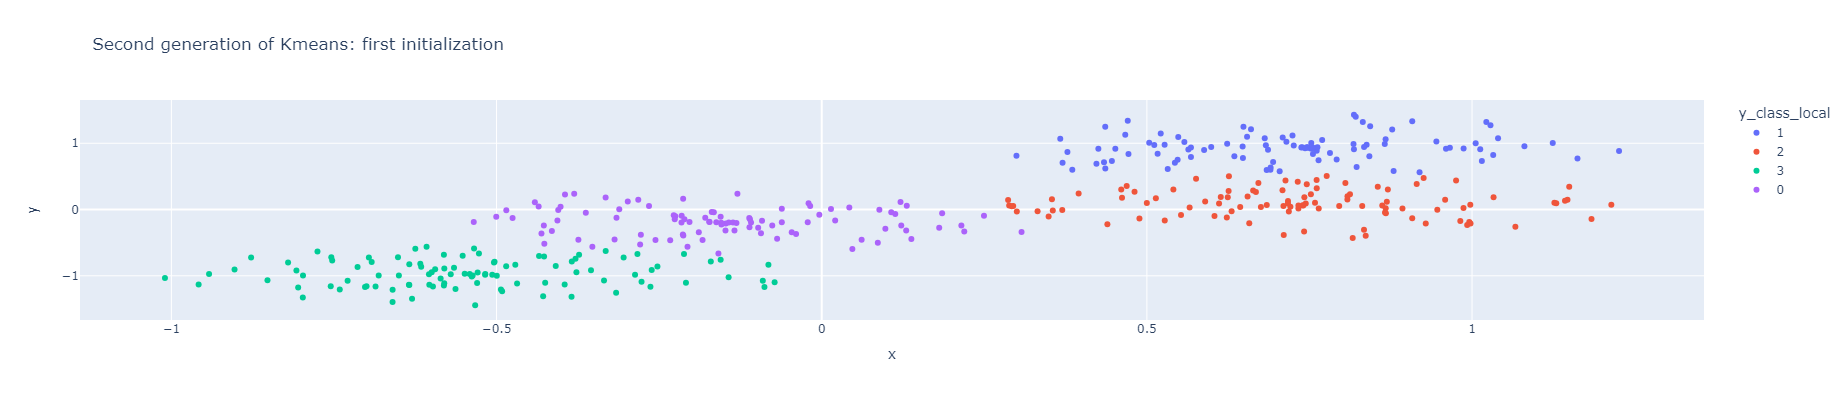

In [288]:
df=pd.DataFrame()
df['y_class_local']=argmin.astype('str')
df['x']=X4[:,0]
df['y']=X4[:,1]
px.scatter(df,x='x',y='y',color='y_class_local',height=400, width=450,
           title='Second generation of Kmeans: first initialization')

Great, the second generation of the algorithm works well 👌👌

##### Choosing the optimal number of classes

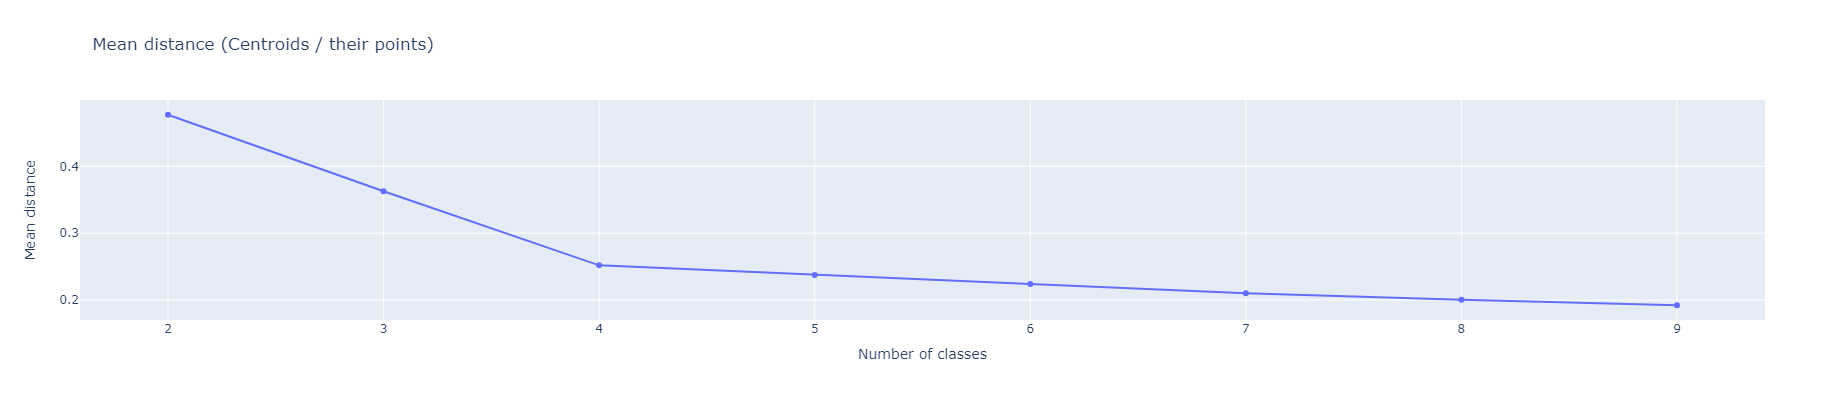

In [145]:
# Empty list to store the mean distance of each number of classes
dis_mean=[]
# Loop through the number of classes, in this time, we will change the classes number from 2 to 9
for k in range(2,10):
    argmin,dis,_=K_means_cluster_V2(X4,Nclass=k)
    dis_mean.append(dis)
# Plot the mean distance in funciton of number of calsses
px.line(x=range(2,10),y=dis_mean,height=400, width=600,markers=True, 
        title='Mean distance (Centroids / their points)', 
       labels={'x':'Number of classes','y':'Mean distance'})

**The optimum is 4: it is the Elbow point**
<br> 
for more details about the elbow point, please see the [wikipedia link](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

### Sklearn K-means object

In this section, we will compare our local algorithm with the Sklearn algorithm

##### Create an instance of KMEANS with number of clusters = 4
* n_init: Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems
<br> 
* For more information about [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [289]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

#### Fit the model with X4 data 

In [290]:
X4.shape

(400, 2)

In [291]:
k_means.fit(X4)

KMeans(n_clusters=4, n_init=12)

##### Get the classes 

In [292]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

In [293]:
set(k_means_labels)

{0, 1, 2, 3}

##### Organize the data in a DF to plot it

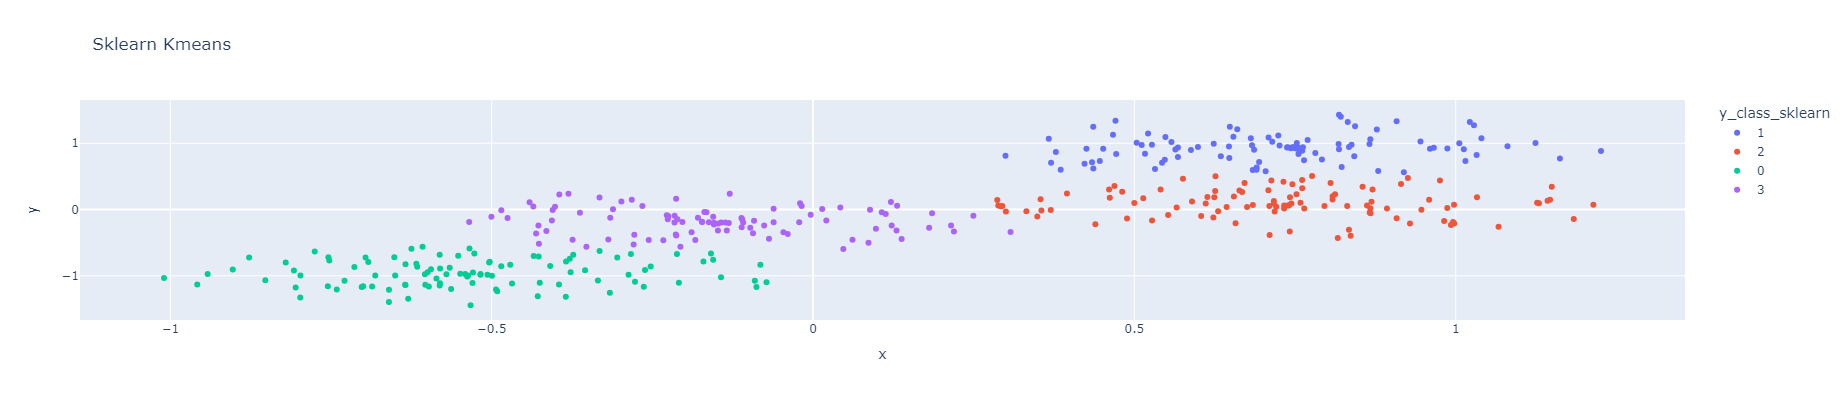

In [294]:
df['y_class_sklearn']=k_means_labels.astype('str')
px.scatter(df,x='x',y='y',color='y_class_sklearn',height=400, width=450,
           title='Sklearn Kmeans')

### Comparaison of local and Sklearn algorithm results

In [295]:
df.head(2)

,y_class_local,x,y,y_class_sklearn
0,1,0.73751,0.93574,1
1,1,0.647209,0.950694,1


##### Use the same classes notation 0 1 2 3 for comparaison

Creat a dictionnary for local classes

In [296]:
dic_local={df.y_class_local.unique()[i]:str(i) for i in range(4)}
dic_local

{'1': '0', '2': '1', '3': '2', '0': '3'}

Repalce the local classes

In [297]:
df.y_class_local=df.y_class_local.replace(dic_local)

Creat a dictionnary for sklearn classes

In [298]:
dic_sklearn={df.y_class_sklearn.unique()[i]:str(i) for i in range(4)}
dic_sklearn

{'1': '0', '2': '1', '0': '2', '3': '3'}

Repalce the sklearn classes

In [299]:
df.y_class_sklearn=df.y_class_sklearn.replace(dic_sklearn)

#### Compare the two results

In [300]:
(df.y_class_sklearn==df.y_class_local).astype(int).sum()/len(df)

0.9975

The two algorithms have the same calsses output at 99.5% 

##### Compare the centroids of both algorithms

Local centroids

In [301]:
dfcentr1=pd.DataFrame(centroids,columns =['x','y'])
dfcentr1['kind']='Local algorithm'

Sklearn centroids

In [302]:
centroids_sklearn=k_means.cluster_centers_
dfcentr2=pd.DataFrame(centroids_sklearn,columns =['x','y'])
dfcentr2['kind']='Sklearn algorithm'

Plot the centroids of the two algorithm

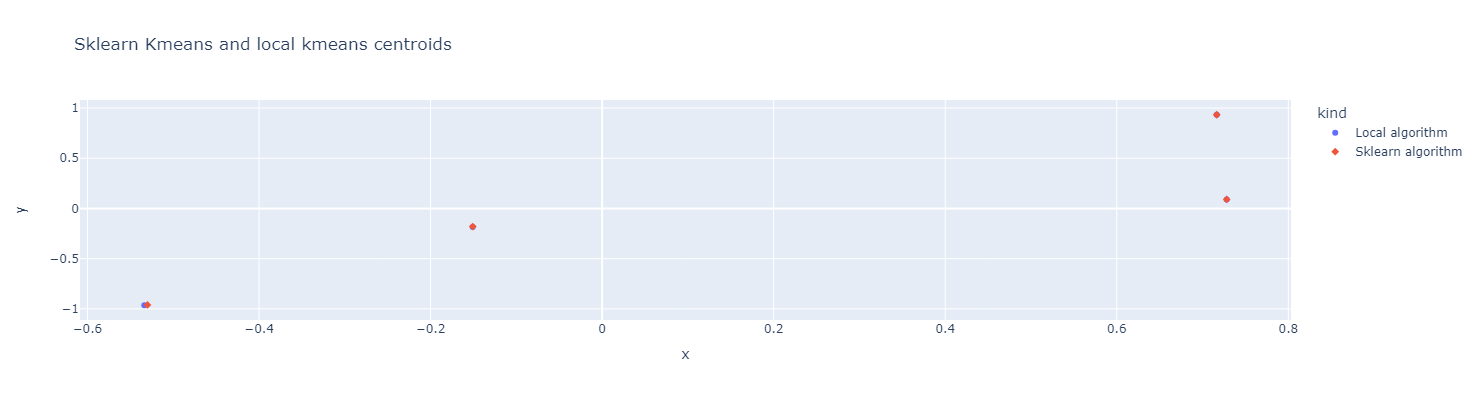

In [304]:
dfcentr=pd.concat([dfcentr1,dfcentr2])
px.scatter(dfcentr,x='x',y='y',color='kind',height=400, width=450,
           title='Sklearn Kmeans and local kmeans centroids',
           symbol='kind')

The two algorithm have centroids very close

### Kmeans applied to the used cars data 

We propose to take a number of classes equal to 5, because we have 5 models, but it is just a choice, not necessary the optimum one

In [278]:
dfplot.y.unique().tolist()

['RENAULT', 'MERCEDES', 'FIAT', 'JAGUAR', 'FERRARI']

##### Local K-Means algorithm 
Calculate the clusters with our local algorithm

In [258]:
argmin,dis,centroids=K_means_cluster_V2(X,Nclass=5,Nrepetitions=12)

##### Organize data in a dataframe and plot it 

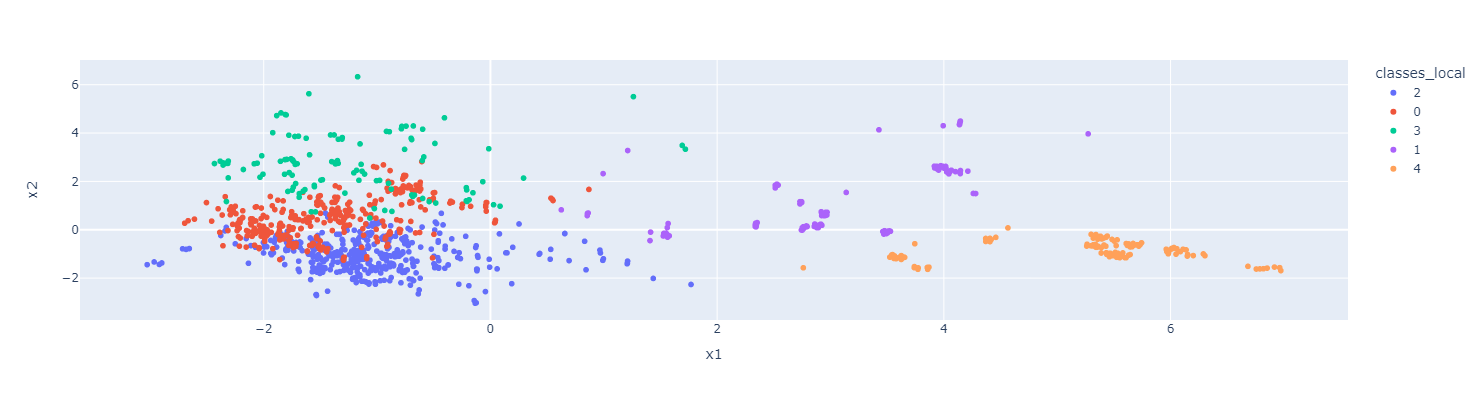

In [279]:
dfplot['classes_local']=argmin.astype('str')
px.scatter(dfplot,x='x1',y='x2',color='classes_local',height=400, width=1000)

##### Sklearn model with 5 centroids

In [196]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_

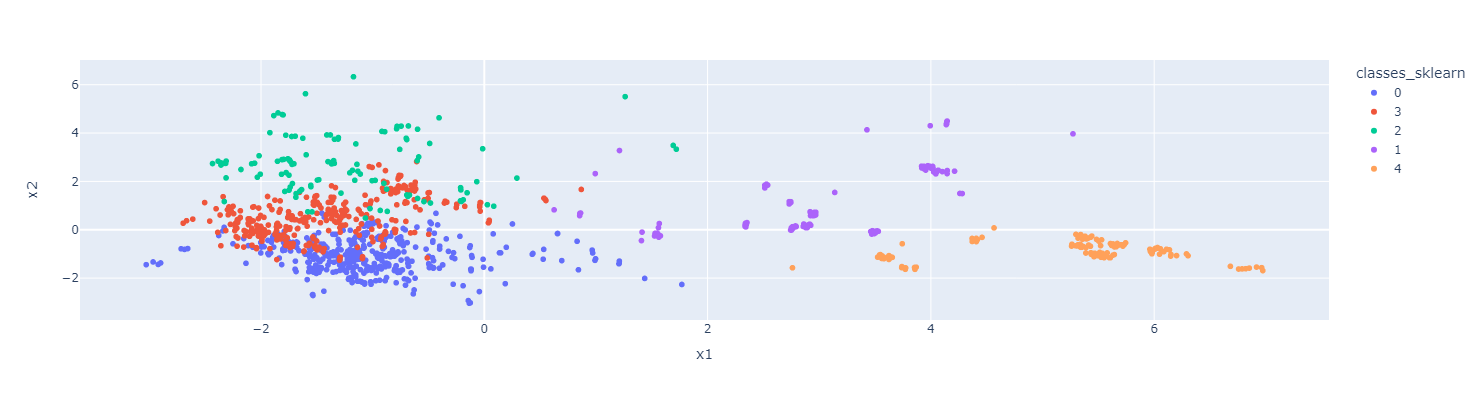

In [280]:
dfplot['classes_sklearn']=k_means_labels.astype('str')
px.scatter(dfplot,x='x1',y='x2',color='classes_sklearn',height=400, width=1000)

In [261]:
dfplot.head(2)

,x1,x2,y,classes_sklearn,classes_local
0,-0.707765,-0.005989,RENAULT,0,2
1,-1.100688,0.658684,RENAULT,3,0


##### Compare Sklearn and local algorithm for the used cars data 

Count classes with Sklearn model

In [262]:
dfplot.classes_sklearn.value_counts()

classes_sklearn
0    493
3    359
1    144
4    140
2    114
Name: count, dtype: int64

Count classes with local model

In [263]:
dfplot.classes_local.value_counts()

classes_local
2    494
0    358
1    144
4    140
3    114
Name: count, dtype: int64

Make the same encoding for both model for comparison

In [264]:
l1=dfplot.classes_sklearn.value_counts().keys().tolist()
l2=dfplot.classes_local.value_counts().keys().tolist()
dicL1_to_L2={x1:x2 for (x1,x2) in zip(l1,l2)}
dicL1_to_L2

{'0': '2', '3': '0', '1': '1', '4': '4', '2': '3'}

##### Accuracy calculation between the output of both models

In [266]:
y1=dfplot.classes_sklearn
y1=y1.replace(dicL1_to_L2)
y2=dfplot.classes_local
(y1==y2).astype(int).sum()/len(y1)

0.9992

the outputs of both models are similar

In [267]:
dfr_sub['ycluster']=dfplot.classes_local.astype('str')

### Understand the pattern of the output classters

In [268]:
df_desc_clus=None 
# loop through the 5 clusters
for i in range (5): 
    cluster =str(i)
    a=dfr_sub[dfr_sub.ycluster==cluster]
    # take the quantil 10% 50% 90% of each cluster / each parameters
    a=a.describe([0.1,0.5,0.9])
    a=a.loc[['10%', '50%', '90%'],:]
    a=a.reset_index()
    a=a.rename(columns={"index":"quantile"})
    a['cluster']=cluster
    a=a.set_index('cluster')
    try: 
        df_desc_clus=pd.concat([df_desc_clus,a])
    except:
        df_desc_clus=a.copy()

##### The comparison of the 5 clusters

In [269]:
df_desc_clus

,quantile,price,km,fuel,CV_fisc,HorseP,Gearbox_auto,L_by_100km,numbe_seats,doors_nb,Euro_stand,Length,Nb_option,registration_date
cluster,,,,,,,,,,,,,,
0,10%,12241.0,14562.9,0.0,4.0,69.0,0.0,3.60,4.0,3.0,6.0,3.570,10.0,2790.0
0,50%,17165.0,56698.0,1.0,5.0,99.0,0.0,4.30,5.0,5.0,6.0,4.250,36.0,3656.5
0,90%,31064.0,110350.2,1.0,9.0,163.0,0.0,5.73,5.0,5.0,6.0,4.703,62.0,4408.3
1,10%,64269.0,18421.0,0.0,27.0,380.0,1.0,8.00,2.0,2.0,5.0,4.470,9.0,1160.4
1,50%,181610.0,34983.0,0.0,48.0,561.0,1.0,8.90,4.0,2.0,6.0,4.570,25.0,2120.5
1,90%,276633.0,92034.6,0.0,52.0,600.0,1.0,12.44,4.0,3.0,6.0,4.670,82.0,3302.4
2,10%,20116.0,32475.0,0.0,6.0,116.0,1.0,3.90,5.0,4.0,6.0,4.360,33.0,2715.3
2,50%,36005.0,78271.5,1.0,9.0,180.0,1.0,5.10,5.0,5.0,6.0,4.690,60.0,3494.5
2,90%,52736.0,128350.7,1.0,19.0,301.0,1.0,6.70,5.0,5.0,6.0,4.960,103.7,4218.2


##### Try to explain the pattern

* Cluster 0: 
    * Almost all cars have Euro_stand=6
    * Manual Gearbox  (0)
    * Fiscal power relatively low (CV_fisc)
    * Low fuel consumption (L/100km)
* Cluster 1: 
    * Almost all cars have fuel = 0 (gasoline)
    * Gearbox_auto= 1 (Automatic)
* Cluster 2: 
    * Almost all cars have a low fuel consumption (L/100km)
    * Number of seats = 5 
    * Euro_stand=6
* Cluster 3:
    * Almost all cars have an Euro standard = 5
    * Relatively low price 
* Cluster 4:
    * Almost all cars have huel = 0 (gasoline)
    * A high horsepower and high fule consumption
    * Euro standard = 6

##### Compare the centroids of both algorithms

Local centroids

In [270]:
dfcentr1=pd.DataFrame(centroids)
kind1=['Local algorithm']*len(dfcentr1)

Sklearn centroids

In [271]:
centroids_sklearn=k_means.cluster_centers_
dfcentr2=pd.DataFrame(centroids_sklearn)
kind2=['Sklearn algorithm']*len(dfcentr2)

Group both centeroids

In [272]:
dfcentr=pd.concat([dfcentr1,dfcentr2])

In [273]:
dfcentr.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.507190,-0.150463,-0.005792,-0.625881,-0.707649,-1.240954,-0.579445,0.202189,0.358282,0.375329,-0.791154,-0.426491,0.404408
1,0.598352,-0.430848,-1.081730,1.093138,1.226348,0.733154,0.974302,-1.006852,-1.545791,-0.825876,0.227701,-0.341603,-1.208179


Dimension reduction of centroids for 2D plotting

In [274]:
xcent=dfcentr.values
xcent_trans = SklearnPCA(n_components=2).fit(xcent).transform(xcent)
xcent_trans

array([[-2.10478518, -1.38119889],
       [ 1.82878944,  1.40998505],
       [-1.62664049, -1.45576436],
       [-2.65745378,  1.98958067],
       [ 4.55949981, -0.56264403],
       [-1.62623468, -1.45654357],
       [ 1.82878944,  1.40998505],
       [-2.65745378,  1.98958067],
       [-2.10401057, -1.38033653],
       [ 4.55949981, -0.56264403]])

Organize the centroids in a dataFrame

In [275]:
dfcentr_trans=pd.DataFrame(xcent_trans,columns =['x','y'])
dfcentr_trans['kind']=kind1+kind2
dfcentr_trans=dfcentr_trans.sort_values(["x","kind"])
dfcentr_trans

,x,y,kind
3,-2.657454,1.989581,Local algorithm
7,-2.657454,1.989581,Sklearn algorithm
0,-2.104785,-1.381199,Local algorithm
8,-2.104011,-1.380337,Sklearn algorithm
2,-1.626640,-1.455764,Local algorithm
5,-1.626235,-1.456544,Sklearn algorithm
6,1.828789,1.409985,Sklearn algorithm
1,1.828789,1.409985,Local algorithm
9,4.559500,-0.562644,Sklearn algorithm
4,4.559500,-0.562644,Local algorithm


Plot the centroids of both models 

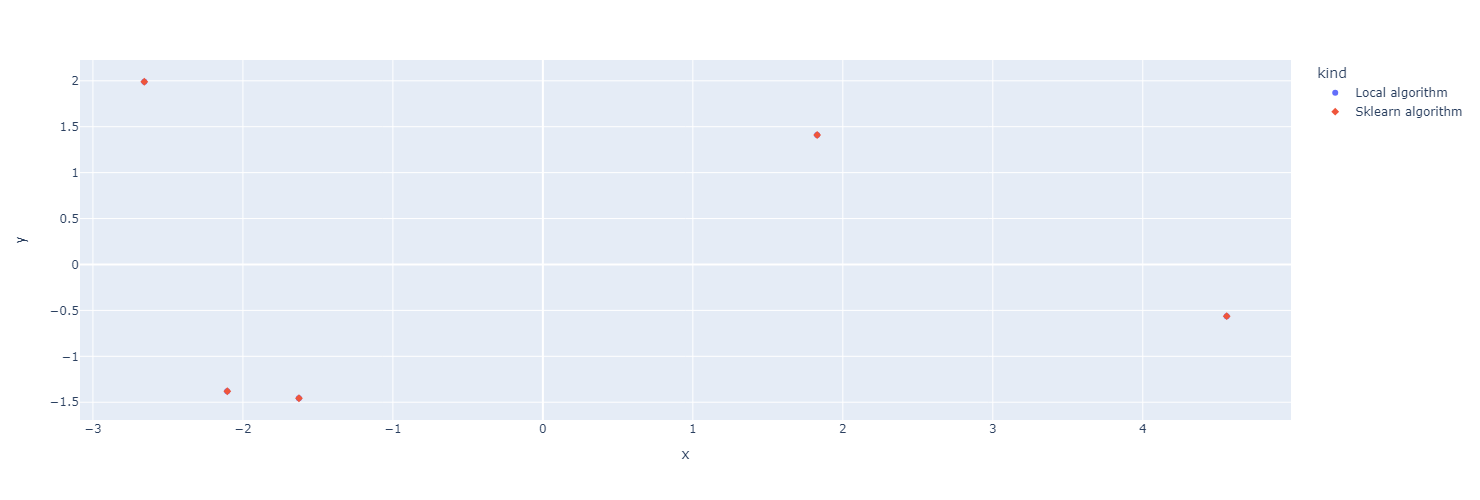

In [282]:
px.scatter(dfcentr_trans,x='x',y='y',color='kind',symbol='kind',height=500, width=600)

Both models have almost the same centeroids

# Conclusion <a name="tit5"></a> 

In this notebook, we compared a K-Nearest Neighbors (KNN) of SKLEARN library and a local realization of this algorithm, the same for K-means
<br>
As conclusion, the local realization of both algorithm has the same performance as the Sklearn library